<a href="https://colab.research.google.com/github/ShriyaGandotra/Intro-Machine-Learning/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Machine Learning/Assignment 2')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations, penalty):

  # initial values
  m = len(X_train)
  theta = np.zeros((X_train.shape[1] + 1, 1))

  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  train_losses = []
  val_losses = []

  for iteration in range(n_iterations):
      gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + (2 * penalty * theta)
      theta -= learning_rate * gradients

      train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + (penalty * np.sum(np.square(theta)))
      val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

      train_losses.append(train_loss)
      val_losses.append(val_loss)

  return train_losses, val_losses, theta

In [44]:
#--------------------------- Preprocessing input data -------------------------#
# Load dataset
data = pd.read_csv('Housing.csv')

# Checking for Null values
data.isnull().sum()*100/data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [45]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

Final parameters (theta): 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] 



<ipython-input-43-aa5d72d88048>:17: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + (penalty * np.sum(np.square(theta)))
<ipython-input-43-aa5d72d88048>:18: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))
<ipython-input-43-aa5d72d88048>:17: RuntimeWarning: invalid value encountered in double_scalars
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + (penalty * np.sum(np.square(theta)))
<ipython-input-43-aa5d72d88048>:14: RuntimeWarning: invalid value encountered in multiply
  gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + (2 * penalty * theta)


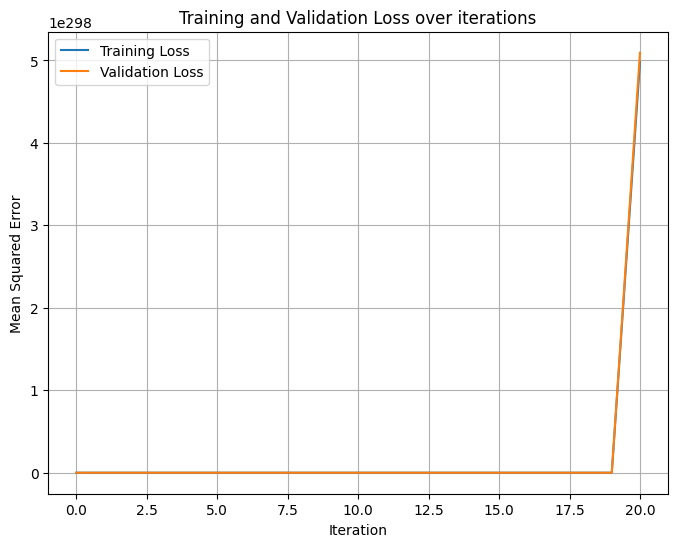

In [46]:
#------------------------------ QUESTION 1-A ----------------------------------#
# Split training and testing data
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

# Select data for specific features for input and output as specified
features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

x_a = df_train[features_a].values
y_a = df_train['price'].values.reshape(-1,1)

# Specify the data into training and validation sets
X_train = x_a
y_train = y_a
X_val = df_test[features_a].values
y_val = df_test['price'].values.reshape(-1, 1)

# Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 100
m = len(X_train)

# initial values
theta = np.zeros(7)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

# Gradient descent for data
train_losses, val_losses, theta = gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations, 0)

print("Final parameters (theta): \n",theta,"\n")

# 4. Plot the training and validation loss after each iteration
plt.rcParams["figure.figsize"] = (8, 6)

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss over iterations")
plt.grid(True)
plt.show()


<ipython-input-43-aa5d72d88048>:17: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + (penalty * np.sum(np.square(theta)))
<ipython-input-43-aa5d72d88048>:18: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))
<ipython-input-43-aa5d72d88048>:17: RuntimeWarning: invalid value encountered in double_scalars
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + (penalty * np.sum(np.square(theta)))
<ipython-input-43-aa5d72d88048>:14: RuntimeWarning: invalid value encountered in multiply
  gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + (2 * penalty * theta)


Final parameters (theta): 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] 



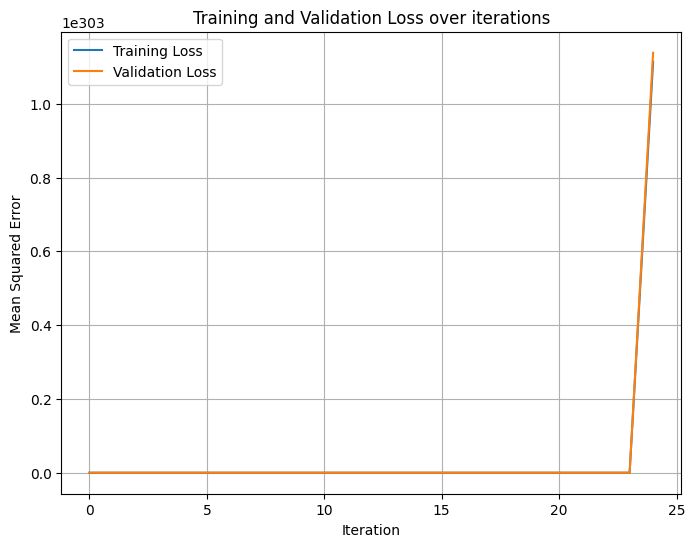

In [52]:
#------------------------------ QUESTION 1-B ----------------------------------#
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

# Select data for specific features for input and output as specified
features_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

x_b = df_train[features_b].values
y_b = df_train['price'].values.reshape(-1,1)

# Split the data into training and validation sets
X_train = x_b
y_train = y_b
X_val = df_test[features_b].values
y_val = df_test['price'].values.reshape(-1, 1)

# Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 100
m = len(X_train)

# initial values
theta = np.zeros(13)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

train_losses, val_losses, theta = gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations,0)

print("Final parameters (theta): \n", theta,"\n")

# Plot the training and validation loss after each iteration
plt.rcParams["figure.figsize"] = (8, 6)

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss over iterations")
plt.grid(True)
plt.show()

Final parameters (theta standerdized): 
 [[4795532.4802592 ]
 [ 729768.06544825]
 [  80274.51822501]
 [ 640897.18710692]
 [ 463267.83023465]
 [ 287404.10709866]] 

Final parameters (theta normalized): 
 [[3022831.12000227]
 [1632027.16515921]
 [1439985.55973345]
 [1276290.6054386 ]
 [1544970.75673438]
 [1349879.93408192]] 



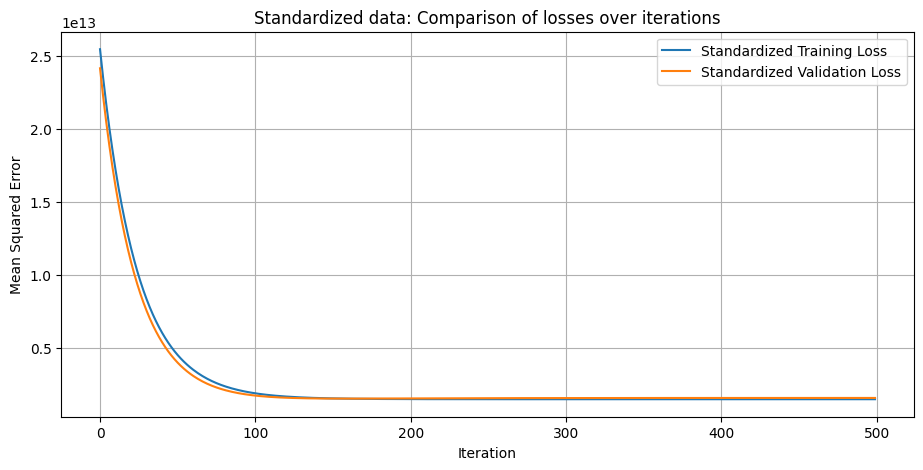

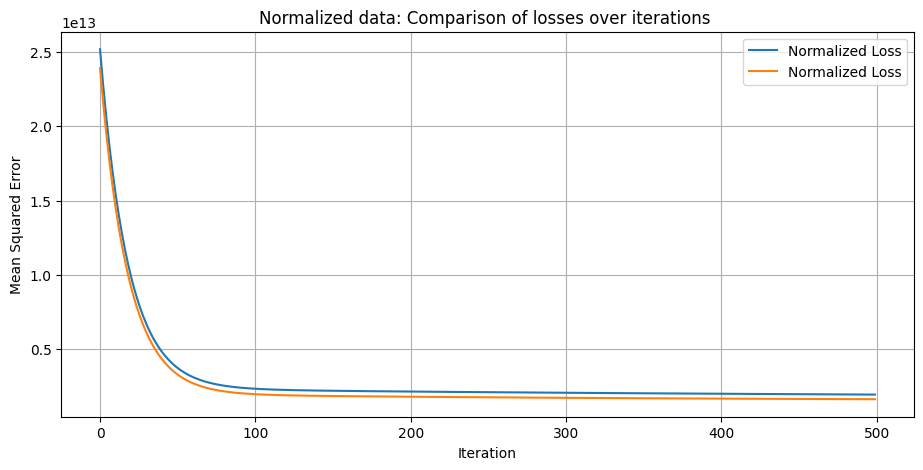

In [48]:
#------------------------------ QUESTION 2-A ----------------------------------#
# Split training and testing data
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

# Select data for specific features for input and output as specified
features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

x_a = df_train[features_a].values
y_a = df_train['price'].values.reshape(-1,1)

# Specify the data into training and validation sets
X_train = x_a
y_train = y_a
X_val = df_test[features_a].values
y_val = df_test['price'].values.reshape(-1, 1)

# Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 500

# Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)

# Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm= scaler_norm.fit_transform(X_val)

# Gradient descent for standardized data
train_losses_std, val_losses_std, theta_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, learning_rate, n_iterations,0)

# Gradient descent for normalized data
train_losses_norm, val_losses_norm, theta_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, learning_rate, n_iterations,0)


print("Final parameters (theta standerdized): \n", theta_std,"\n")
print("Final parameters (theta normalized): \n", theta_norm,"\n")


# Plot the training and validation loss after each iteration
plt.rcParams["figure.figsize"] = (11, 5)

plt.plot(train_losses_std, label= "Standardized Training Loss")
plt.plot(val_losses_std, label= "Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized data: Comparison of losses over iterations")
plt.grid(True)
plt.show()

# Plot the training and validation loss after each iteration
plt.plot(train_losses_norm, label= "Normalized Loss")
plt.plot(val_losses_norm, label= "Normalized Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized data: Comparison of losses over iterations ")
plt.grid(True)
plt.show()

Final parameters (theta standerdized): 
 [[4795532.4802592 ]
 [ 532196.23339478]
 [  74082.48804257]
 [ 578267.7497641 ]
 [ 366136.56698615]
 [ 210785.26176516]
 [ 146723.18958035]
 [ 144262.43274893]
 [ 205065.09239674]
 [ 400442.65917073]
 [ 222425.97858708]
 [ 256031.33938607]] 

Final parameters (theta normalized): 
 [[1794105.36834644]
 [1040787.52173454]
 [1009720.07479444]
 [1092670.64200842]
 [1179184.28302897]
 [1158906.12227032]
 [ 515945.25018848]
 [ 369418.26128065]
 [ 496349.1601849 ]
 [1098106.29943351]
 [ 924912.16915336]
 [ 631307.00935071]] 



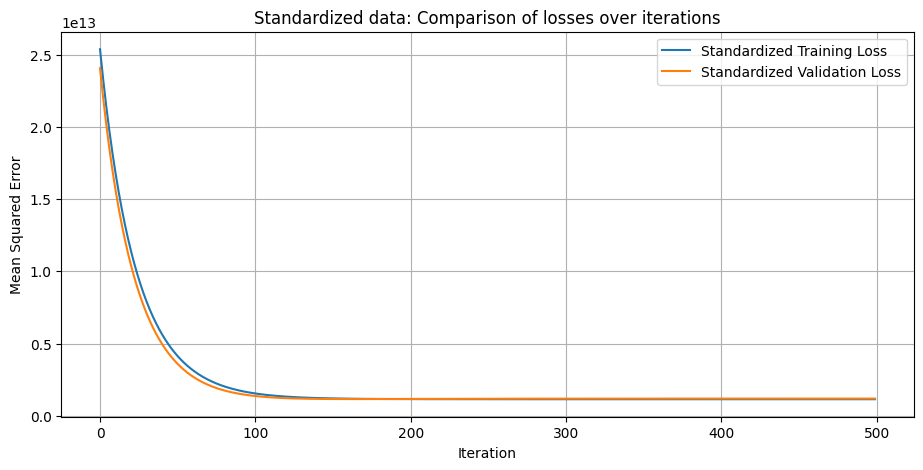

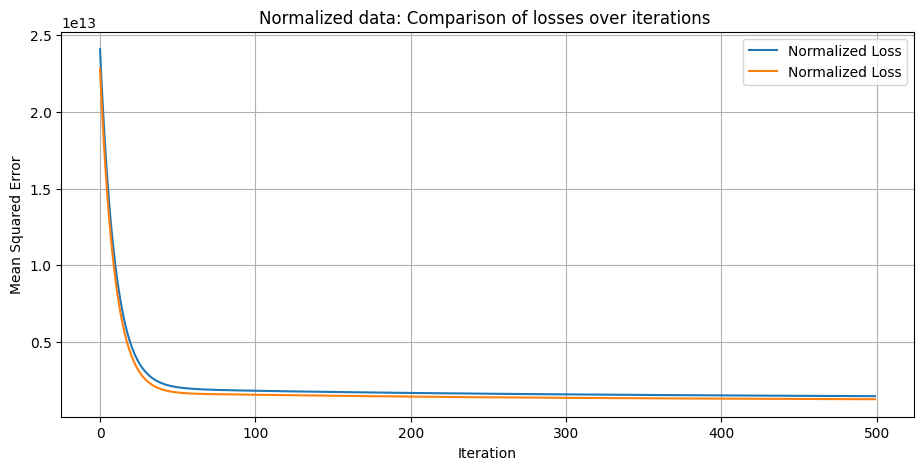

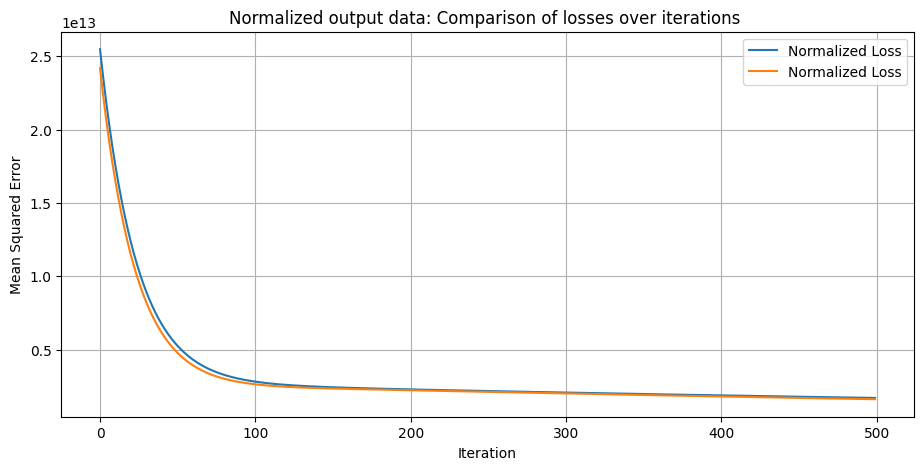

In [49]:
#------------------------------ QUESTION 2-B ----------------------------------#
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

# 1.Select data for specific features for input and output as specified
features_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

x_b = df_train[features_b].values
y_b = df_train['price'].values.reshape(-1,1)

# 2. Split the data into training and validation sets
X_train = x_b
y_train = y_b
X_val = df_test[features_b].values
y_val = df_test['price'].values.reshape(-1, 1)

# Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 500

# Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)

# Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm= scaler_norm.fit_transform(X_val)

# Normalization for output
scaler_norm = MinMaxScaler()
X_train_norm_out = scaler_norm.fit_transform(y_train)
X_val_norm_out= scaler_norm.fit_transform(y_val)

# Gradient descent for standardized data
train_losses_std, val_losses_std, theta_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, learning_rate, n_iterations,0)

# Gradient descent for normalized data
train_losses_norm, val_losses_norm, theta_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, learning_rate, n_iterations,0)

# Gradient descent for normalized output
train_losses_norm_out, val_losses_norm_out, theta_norm_out = gradient_descent(X_train_norm_out, y_train, X_val_norm_out, y_val, learning_rate, n_iterations,0)

print("Final parameters (theta standerdized): \n", theta_std,"\n")
print("Final parameters (theta normalized): \n", theta_norm,"\n")

# Plot the training and validation loss after each iteration
plt.rcParams["figure.figsize"] = (11, 5)

plt.plot(train_losses_std, label= "Standardized Training Loss")
plt.plot(val_losses_std, label= "Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized data: Comparison of losses over iterations")
plt.grid(True)
plt.show()

# Plot the training and validation loss after each iteration
plt.plot(train_losses_norm, label= "Normalized Loss")
plt.plot(val_losses_norm, label= "Normalized Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized data: Comparison of losses over iterations ")
plt.grid(True)
plt.show()

# Plot the training and validation loss after each iteration
plt.plot(train_losses_norm_out, label= "Normalized Loss")
plt.plot(val_losses_norm_out, label= "Normalized Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized output data: Comparison of losses over iterations ")
plt.grid(True)
plt.show()

Final parameters (theta standardized): 
 [[4748070.85873194]
 [ 723434.62558092]
 [  83864.12591204]
 [ 635724.42712852]
 [ 459347.15542278]
 [ 287030.24638165]] 

Final parameters (theta normalized): 
 [[3020064.05966645]
 [1589727.30126138]
 [1429587.76907172]
 [1233206.95173938]
 [1517893.68764534]
 [1326760.24390088]] 



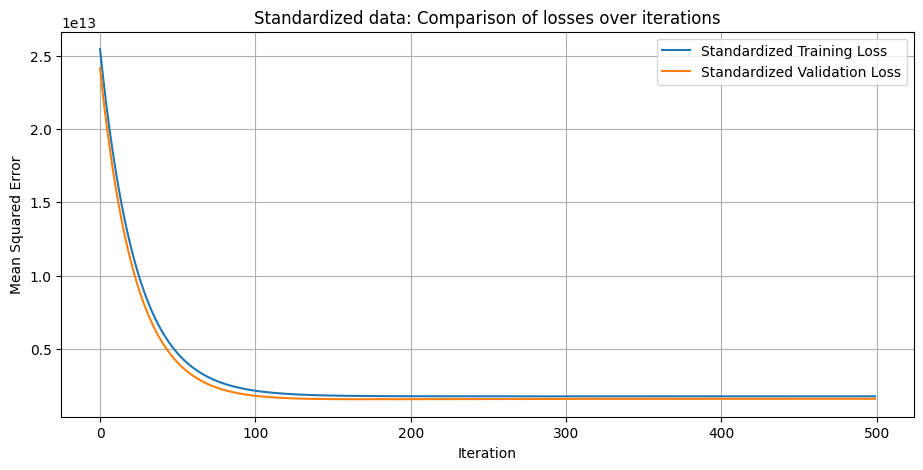

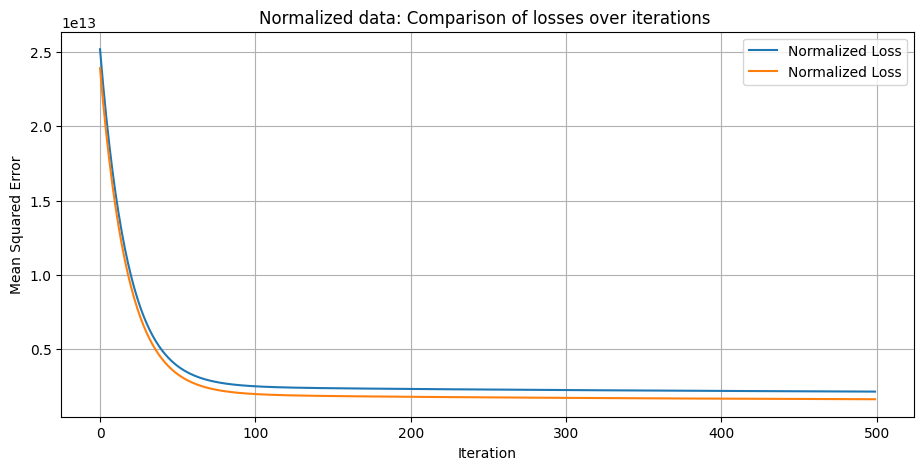

In [50]:
#------------------------------ QUESTION 3-A ----------------------------------#
# Split training and testing data
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

# Select data for specific features for input and output as specified
features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

x_a = df_train[features_a].values
y_a = df_train['price'].values.reshape(-1,1)

# Specify the data into training and validation sets
X_train = x_a
y_train = y_a
X_val = df_test[features_a].values
y_val = df_test['price'].values.reshape(-1, 1)

# Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 500

# Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)

# Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm= scaler_norm.fit_transform(X_val)

# Gradient descent for standardized data
train_losses_std, val_losses_std, theta_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, learning_rate, n_iterations,0.01)

# Gradient descent for normalized data
train_losses_norm, val_losses_norm, theta_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, learning_rate, n_iterations,0.01)

print("Final parameters (theta standardized): \n", theta_std,"\n")
print("Final parameters (theta normalized): \n", theta_norm,"\n")

# Plot the training and validation loss after each iteration
plt.rcParams["figure.figsize"] = (11, 5)

plt.plot(train_losses_std, label= "Standardized Training Loss")
plt.plot(val_losses_std, label= "Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized data: Comparison of losses over iterations")
plt.grid(True)
plt.show()

# Plot the training and validation loss after each iteration
plt.plot(train_losses_norm, label= "Normalized Loss")
plt.plot(val_losses_norm, label= "Normalized Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized data: Comparison of losses over iterations ")
plt.grid(True)
plt.show()


Final parameters (theta standerdized): 
 [[4748070.85873194]
 [ 528350.24691654]
 [  77143.78330887]
 [ 573619.52945187]
 [ 363547.91699171]
 [ 210590.61451572]
 [ 147255.70266681]
 [ 143040.29908417]
 [ 202961.10228071]
 [ 398323.14251465]
 [ 222473.52641099]
 [ 254826.37256294]] 

Final parameters (theta normalized): 
 [[1791242.20751488]
 [1012850.1324281 ]
 [ 996754.59621623]
 [1052709.43773474]
 [1154016.44734503]
 [1176650.72910155]
 [ 509366.22167153]
 [ 379529.43161176]
 [ 478550.97417855]
 [1084039.30622483]
 [ 906522.02047454]
 [ 624994.73195674]] 



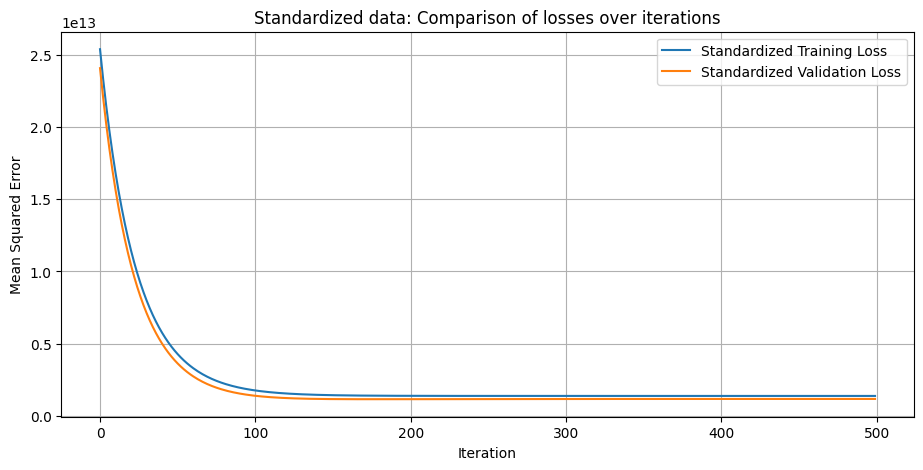

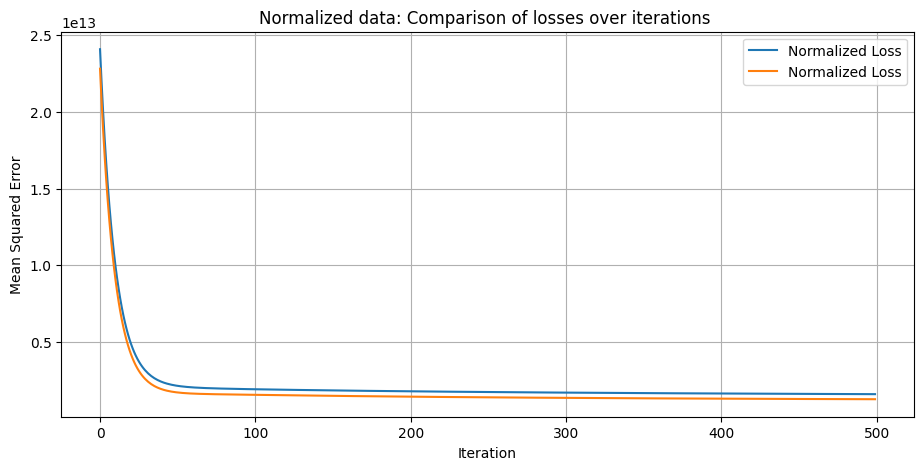

In [51]:
#------------------------------ QUESTION 3-B ----------------------------------#
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

# 1.Select data for specific features for input and output as specified
features_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

x_b = df_train[features_b].values
y_b = df_train['price'].values.reshape(-1,1)

# 2. Split the data into training and validation sets
X_train = x_b
y_train = y_b
X_val = df_test[features_b].values
y_val = df_test['price'].values.reshape(-1, 1)

# Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 500

# Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)

# Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm= scaler_norm.fit_transform(X_val)

# Gradient descent for standardized data
train_losses_std, val_losses_std, theta_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, learning_rate, n_iterations,.01)

# Gradient descent for normalized data
train_losses_norm, val_losses_norm, theta_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, learning_rate, n_iterations,.01)

print("Final parameters (theta standerdized): \n", theta_std,"\n")
print("Final parameters (theta normalized): \n", theta_norm,"\n")

# Plot the training and validation loss after each iteration
plt.rcParams["figure.figsize"] = (11, 5)

plt.plot(train_losses_std, label= "Standardized Training Loss")
plt.plot(val_losses_std, label= "Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized data: Comparison of losses over iterations")
plt.grid(True)
plt.show()

# Plot the training and validation loss after each iteration
plt.plot(train_losses_norm, label= "Normalized Loss")
plt.plot(val_losses_norm, label= "Normalized Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized data: Comparison of losses over iterations ")
plt.grid(True)
plt.show()